In [2]:
include("laser_rate_equations.jl")
using Plots, StatsBase

We calculate the frequency response of the directly-modulated laser under small modulation. This is done by integrating the system for different modulation frequencies and computing the Fourier component of the optical intensity at this frequency. We compare both the norm and the phase with the analytical transfer function of the relaxation oscillations.

In [69]:
r = 2 # normalized bias [u.a.]
m = 1.5 # modulation index [u.a.]
f0 = 10e9 # modulation frequncy [Hz]
τp = 5e-12 # Carrier lifetime [s]
τc = 180e-12 # Photon lifetime [s]
α = 3.8 # Linewidth enhancement factor
ϵ = τp/τc # Lifetime ratio


Fs = (8:0.1:12)*1e9 # Frequency vector

Iw1 = [] # Optical intensity vector with respect to frequency
Iw2 = [] # Optical intensity vector with respect to frequency

for fi in Fs
    plas = r, m, fi, τp, τc, α
    Np = 10 # number of periods to capture
    ti = 100/fi  # capture signal after few oscillations to avoid transient regime
    tf = ti + 100/fi
    N = 2^14 

    E, _, t = integrate(plas, ti,tf, N);
    t=t.-t[1]
    # automatic point density 
    I = abs2.(E) # intensity waveform 

    c1 = 2*mean(I.*cis.(2π*fi*t)) # Fourier complex amplitude component at fi 
    c2 = 2*mean(I.*cis.(π*fi*t)) # Fourier complex amplitude component at fi 
    append!(Iw1, c1 .|> abs) # Fourier component norm at fi
    append!(Iw2, c2 .|> abs) # Fourier component norm at fi

end



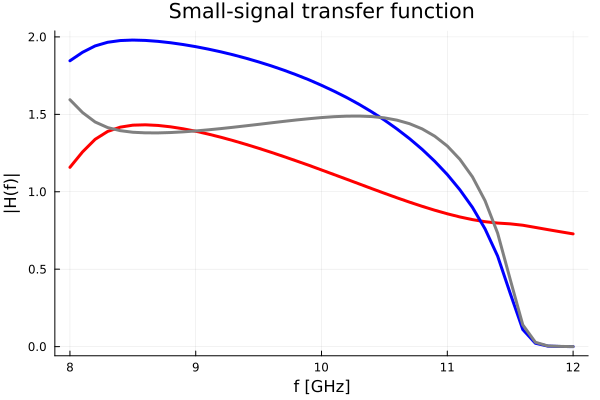

In [70]:

Hn = H.(Fs) # analytic complex trasnfer function vector 

begin 
plot(Fs/1e9,Iw1,lw=3, color=:red, label=false)
plot!(Fs/1e9,Iw2,lw=3, color=:blue, label=false)
plot!(Fs/1e9,Iw2./Iw1,lw=3, color=:grey, label=false)
# The r*m normalisation factor was found empiricaly -> easy to demonstrate under linear approximation Iout ∝ η*r*m*H(fm) 


ylabel!("|H(f)|")
xlabel!("f [GHz]")
plot!(title="Small-signal transfer function")
end

We show perfect agreement between theory and simulation for low modulation index values (m < 10%). This confirms the numerical model correctness.